<a href="https://colab.research.google.com/github/alexander-k-j-lim/Simple-Facial-Recognision/blob/master/simple_facial_recognision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [0]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [0]:
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [0]:
X = lfw_people.data
print(X.shape)
n_features = X.shape[1]
print(n_features)
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

[[254.       254.       251.66667  ...  65.333336  50.666668  40.333332]
 [253.33333  251.33333  247.33333  ...  66.666664  52.        42.666668]
 [240.66667  231.66667  211.66667  ...  62.        49.        42.      ]
 ...
 [ 74.333336  54.        31.666666 ...  97.666664  93.        90.      ]
 [ 65.333336  47.        30.333334 ...  91.666664  92.        86.333336]
 [ 59.333332  44.333332  32.333332 ...  87.333336  88.666664  86.666664]]
(1288, 1850)
1850


In [0]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
import matplotlib.pyplot as plt

#splitting trainning set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

In [0]:
# Center data
mean = np.mean(X_train, axis = 0)
X_train -= mean
print(X_train.shape)
X_test -= mean

(966, 1850)


In [0]:
# Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

In [0]:
# project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


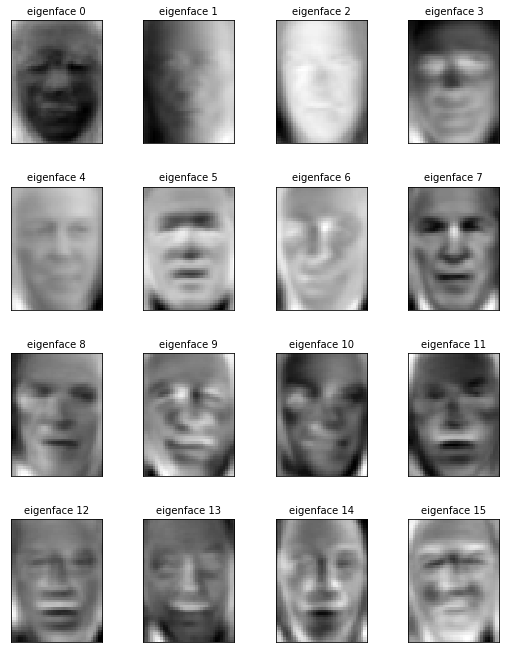

In [0]:
def plot_gallery(images, titles, h, w, n_row=4, n_col=4):
  """Helper function to plot a gallery of portraits"""
  plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=10)
    plt.xticks(())
    plt.yticks(())
    
  
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

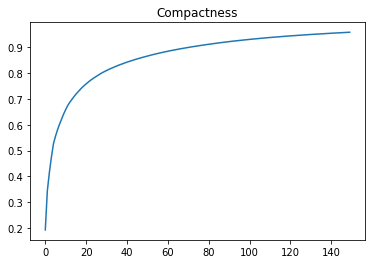

In [0]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
print(X_transformed.shape)
print(y_train.shape)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)

#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)

print(classification_report(y_test, predictions, target_names=target_names))

(966, 150)
(966,)
Total Testing 322
Predictions [3 3 1 3 3 3 3 1 3 3 3 6 3 3 3 3 6 3 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 4 3 1 1 1 6 2 5 1 4 1 3 4 6 3 3
 3 2 3 1 1 3 6 3 3 3 3 3 3 3 3 3 3 6 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 3
 3 3 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 4 3 3 3 3 1 3 3 1 3 3 1 3
 3 1 1 3 3 3 3 3 6 3 3 3 6 5 3 1 3 3 5 1 3 3 1 3 3 1 5 3 3 2 3 3 3 3 3 3 2
 3 3 3 3 3 4 3 2 3 6 3 3 3 3 6 3 3 3 2 3 3 6 2 2 3 1 5 4 3 3 6 3 2 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 0 3 1 3 6 3 3 3 4 3 3 3 3 3 3 1 4 4 3 3 4 3 4 3 1 3
 3 3 3 3 1 3 4 1 1 3 1 1 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 3 3 3 3 6 3 2 1 3 3 3 3 3 3 3 1 3 3 3 4 1 3 3 4 3]
Which Correct: [ True  True False  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False Fal